# TEMPLATE 

Binary Classifiers : perceptron and logistic regression
1. 2D Toy Data. Training the models
2. Visualization of the Feature Space (visual evaluation of the models).



In [1]:
#numeric: pandas and numpy
import numpy as np
import pandas as pd
# graphics
%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 

In [2]:
#Toy examples illustration. Verify if package "mlxten"
from mlxtend.plotting import plot_decision_regions


# Toy Data

Starting with toy data to understand the main characteristics of the models. 
1. Creating artificial data with two characteristics 
    might be useful.

Scikit- learn provides also data sets with real data and all of them are avalaible and easily download and written in the proper formats 

https://scikit-learn.org/stable/datasets/index.html

In [3]:
from sklearn.datasets import make_blobs, make_circles, make_moons, make_circles

X_blobs, y_blobs = make_blobs(n_samples=100, centers=2, n_features=2, random_state=None)

X_moon,y_moon= make_moons(n_samples=100, shuffle=True, noise=None, random_state=None)

X_cir, y_cir= make_circles(n_samples=100, shuffle=True, noise=None, random_state=None, factor=0.4)

In [4]:
print(np.unique(y_blobs))

[0 1]


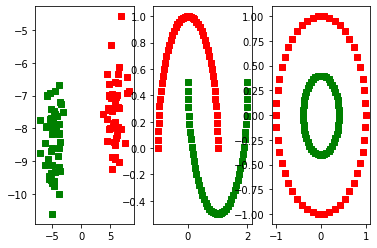

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.scatter(X_blobs[y_blobs==0,0],X_blobs[y_blobs==0,1],marker='s',color='r',label='0' )
ax1.scatter(X_blobs[y_blobs==1,0],X_blobs[y_blobs==1,1],marker='s',color='g',label='0' )
#ax1.set_aspect('equal')
ax2.scatter(X_moon[y_moon==0,0],X_moon[y_moon==0,1],marker='s',color='r',label='0' )
ax2.scatter(X_moon[y_moon==1,0],X_moon[y_moon==1,1],marker='s',color='g',label='0' )

ax3.scatter(X_cir[y_cir==0,0],X_cir[y_cir==0,1],marker='s',color='r',label='0' )
ax3.scatter(X_cir[y_cir==1,0],X_cir[y_cir==1,1],marker='s',color='g',label='0' )


# Learning 

There are two steps 
1.  The creation of the  classifier.  Comprises the assignment of the parameters of the training algorithm (called hyper-parameters) which have influence on the performance of the classifier.
2. The training phase. Which  is the adaption of the model parameters using a training set.

After learning there is the test phase.  To measure the performance on unseen data, e.g,  data not included in the  traning set. The test set 


### Learning with linear discriminant classifiers 

In [6]:
# The Data set
X=X_blobs
y=y_blobs

In [7]:
from sklearn.linear_model import Perceptron
#Create perceptron and assign hyperparameters (max_iter, eta0- learning rate)
ppn=Perceptron(penalty=None, alpha=0.0001, fit_intercept=True, max_iter=20, tol=None, 
               eta0=0.1, n_jobs=1, random_state=0, class_weight=None, warm_start=False)

#Learning
ppn.fit(X,y)



Perceptron(eta0=0.1, max_iter=20, n_jobs=1, tol=None)

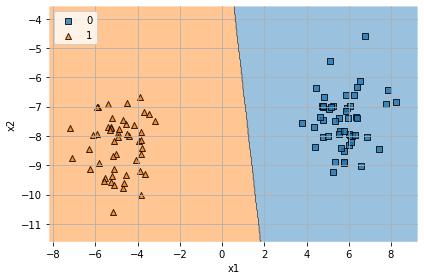

In [8]:
plot_decision_regions(X, y, clf=ppn)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()


In [9]:
print('number of iteration', ppn.n_iter_)
print('weights', ppn.coef_)
print('bias',ppn.intercept_)

number of iteration 20
weights [[-1.04561879 -0.16427183]]
bias [0.]


## Gradient based algorithms
### ADALINE, logistic regression. 

See  details on: https://scikit-learn.org/stable/modules/sgd.html

In [10]:
from sklearn.linear_model import SGDClassifier
# With loss="log" a logistic regression is be appllied.  with loss="squared_loss" is least squares.

gd=SGDClassifier(loss="log", max_iter=20)

gd


SGDClassifier(loss='log', max_iter=20)

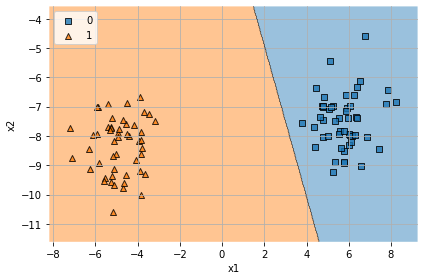

In [11]:
# fit
gd=gd.fit(X,y)
# how it learns
plot_decision_regions(X, y, clf=gd)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()


In [12]:
#Parameters
print('number of iteration', gd.n_iter_)
print('weights', gd.coef_)
print('bias',gd.intercept_)

number of iteration 7
weights [[-50.27128667 -19.47361031]]
bias [4.99000999]


## Question:
1. Calculate the equation of the decision boundary
2. The model learns all the training data?